Checking Versions of Libraries

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.7.3
numpy: 1.17.3
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 1.0.2


Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve, accuracy_score

EXPLARATORY DATA ANALYSIS

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv('engine_data.csv')
#previewdataset
df.head(5)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [5]:
# Check size and shape of datasets
df.shape

(19535, 7)

In [6]:
# count missing values per feature
missing_values = df.isnull().sum()
print('Missing values per feature:')
print(missing_values)

Missing values per feature:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


In [7]:
#identify duplicated values
duplicates=df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [Engine rpm, Lub oil pressure, Fuel pressure, Coolant pressure, lub oil temp, Coolant temp, Engine Condition]
Index: []


In [8]:
# check data types of each feature
print('Data types of each feature:')
print(df.dtypes)

Data types of each feature:
Engine rpm            int64
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition      int64
dtype: object


In [9]:
# check for any inconsistent values in categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    unique_values = df[feature].unique()
    if len(unique_values) > 1:
        print(f'Inconsistent values found in {feature}:')
        print(unique_values)

In [10]:
# check for any outliers in numeric features
numeric_features = df.select_dtypes(include=['int', 'float']).columns.tolist()
for feature in numeric_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    if not outliers.empty:
        print(f'Outliers found in {feature}:')
        print(outliers)

Outliers found in Lub oil pressure:
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
397           518          0.143225       8.248790          2.914021   
440           945          6.458110       3.353951          1.502761   
587           855          0.072615       5.103394          1.492320   
632          1521          0.189372       9.035043          3.197902   
649           562          0.158712       4.889464          2.750011   
...           ...               ...            ...               ...   
18055         459          0.192741       6.948251          1.511395   
18206        1074          0.139910       3.647008          1.820412   
18296         366          0.040510       7.073204          1.770705   
18321         504          0.060044       5.258089          2.049384   
18336        1470          6.575457       8.037259          1.770325   

       lub oil temp  Coolant temp  Engine Condition  
397       82.571161     66.807639            

In [11]:
from sklearn.preprocessing import RobustScaler
# convert the DataFrame to a numpy array
data = df.to_numpy()

# create the scaler object
scaler = RobustScaler()

# fit and transform the data
robust_data = scaler.fit_transform(data)

# print the original and robust scaled data
print("Original data:\n", data)
print("\nRobust scaled data:\n", robust_data)

Original data:
 [[700.           2.49359182  11.79092738 ...  84.14416293  81.6321865
    1.        ]
 [876.           2.94160593  16.19386556 ...  77.64093415  82.4457245
    0.        ]
 [520.           2.96174558   6.55314691 ...  77.75226574  79.64577667
    1.        ]
 ...
 [684.           2.67334447   4.92737579 ...  76.84493964  86.33734527
    1.        ]
 [696.           3.09416337   8.29181555 ...  77.17969299  73.62439552
    1.        ]
 [504.           3.77524598   3.96248044 ...  75.56431251  80.42142145
    1.        ]]

Robust scaled data:
 [[-0.13489736 -0.43505478  1.97632087 ...  3.12350749  0.36424919
   0.        ]
 [ 0.38123167 -0.14346565  3.53318168 ...  0.35110358  0.45444197
  -1.        ]
 [-0.6627566  -0.13035779  0.12426326 ...  0.39856556  0.14402613
   0.        ]
 ...
 [-0.18181818 -0.31806311 -0.45060271 ...  0.01176163  0.88588597
   0.        ]
 [-0.14662757 -0.04417393  0.73904933 ...  0.15447098 -0.52353346
   0.        ]
 [-0.70967742  0.3991074  

In [12]:
# Separate target variable and features
df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

# Fit the Gradient Boosting Classifier on the data
model = GradientBoostingClassifier()
model.fit(X, y)

# Get the feature importances and sort in descending order
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).sort_values('importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)

            feature  importance
0        Engine rpm    0.585820
2     Fuel pressure    0.160589
4      lub oil temp    0.102232
1  Lub oil pressure    0.076013
3  Coolant pressure    0.042967
5      Coolant temp    0.032378


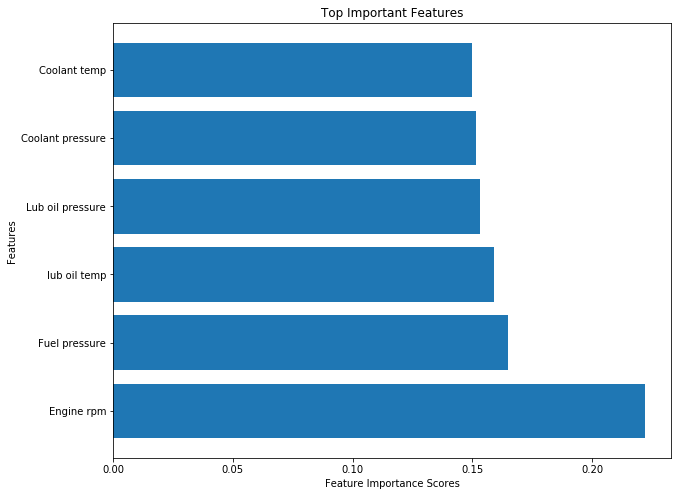

In [13]:

# Convert numpy array to pandas DataFrame
df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])

# Separate the features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Create an instance of the ExtraTreesClassifier algorithm
model = ExtraTreesClassifier()

# Fit the model on the data
model.fit(X, y)

# Get the feature importance scores
importances = model.feature_importances_

# Sort the feature importance scores in descending order
sorted_importances = sorted(zip(importances, X.columns), reverse=True)

# Select the top 7 features
best_features = [feature[1] for feature in sorted_importances[:7]]

# Plot the feature importance scores of the top 7 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(best_features)), [importances[X.columns.get_loc(feature)] for feature in best_features], align='center')
plt.yticks(range(len(best_features)), best_features)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Top Important Features')
plt.show()

In [14]:
# Count the number of 0s and 1s
count = df['Engine Condition'].value_counts()
print(count)
#print("Good Condition:", count[1])
#print("Bad Condition:", count[0])

1.0    12317
0.0     7218
Name: Engine Condition, dtype: int64


**Important**


*   There is binary encoding to the target variable
    0: Bad Condition
    1: Good Condition



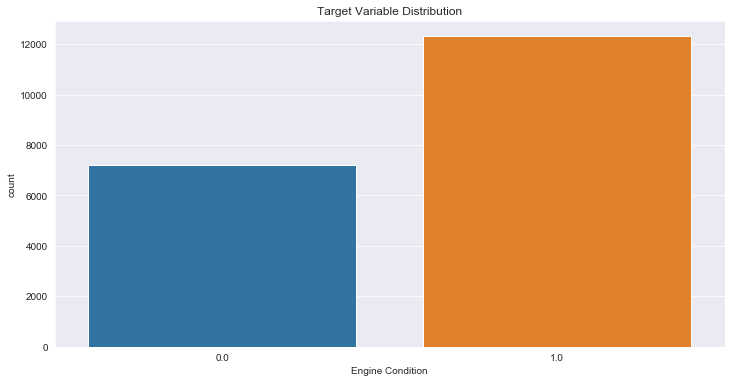

In [15]:
# A box plot showing target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Engine Condition', data = df)
plt.title('Target Variable Distribution')
plt.show()

In [16]:
undersampler = RandomUnderSampler()
oversampler = RandomOverSampler()
smote = SMOTE()
samplers = [undersampler, oversampler, smote]

model = RandomForestClassifier()
def train_model_on_sampling_techniques(model, samplers, X, y):
    for sampler in samplers:
        X_train, y_train = sampler.fit_resample(X, y)
        pipeline = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(pipeline, X_train, y_train, scoring='recall')
        print("The recall score for RFC using {0} is {1} (+/- {2})".format(str(sampler), round(scores.mean(), 3), round(scores.std(), 2)))

train_model_on_sampling_techniques(model, samplers, X, y)

The recall score for RFC using RandomUnderSampler() is 0.599 (+/- 0.02)
The recall score for RFC using RandomOverSampler() is 0.707 (+/- 0.02)
The recall score for RFC using SMOTE() is 0.652 (+/- 0.01)


In [17]:
#oversampling
rus = RandomOverSampler(sampling_strategy=1)
X_train_res,y_train_res = rus.fit_resample(X,y)
x = pd.DataFrame(X_train_res)
y = pd.DataFrame(y_train_res)

data = pd.concat([x,y], axis = 1)
data

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700.0,2.493592,11.790927,3.178981,84.144163,81.632187,1.0
1,876.0,2.941606,16.193866,2.464504,77.640934,82.445724,0.0
2,520.0,2.961746,6.553147,1.064347,77.752266,79.645777,1.0
3,473.0,3.707835,19.510172,3.727455,74.129907,71.774629,1.0
4,619.0,5.672919,15.738871,2.052251,78.396989,87.000225,0.0
...,...,...,...,...,...,...,...
24629,692.0,4.388338,5.776997,2.871171,80.339260,74.978786,0.0
24630,1163.0,3.563582,4.430761,1.299133,76.032517,82.955535,0.0
24631,722.0,1.951985,3.718977,1.436095,77.672513,77.612884,0.0
24632,875.0,3.225740,6.217433,2.223079,78.049561,73.712487,0.0


In [18]:
print(X_train_res.shape,y_train_res.shape)

(24634, 6) (24634,)


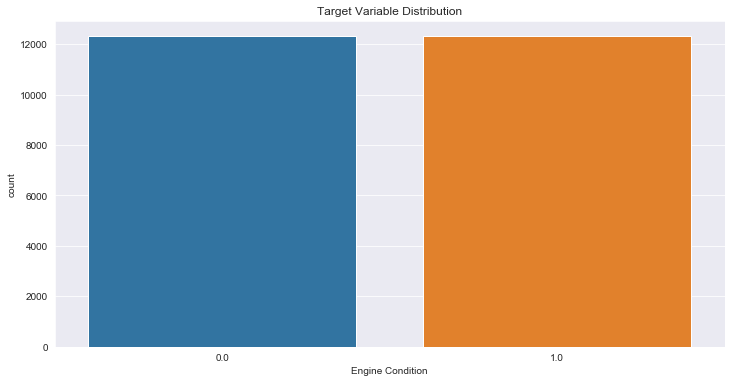

In [19]:
# A box plot showing oversampled target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Engine Condition', data = data)
plt.title('Target Variable Distribution')
plt.show()

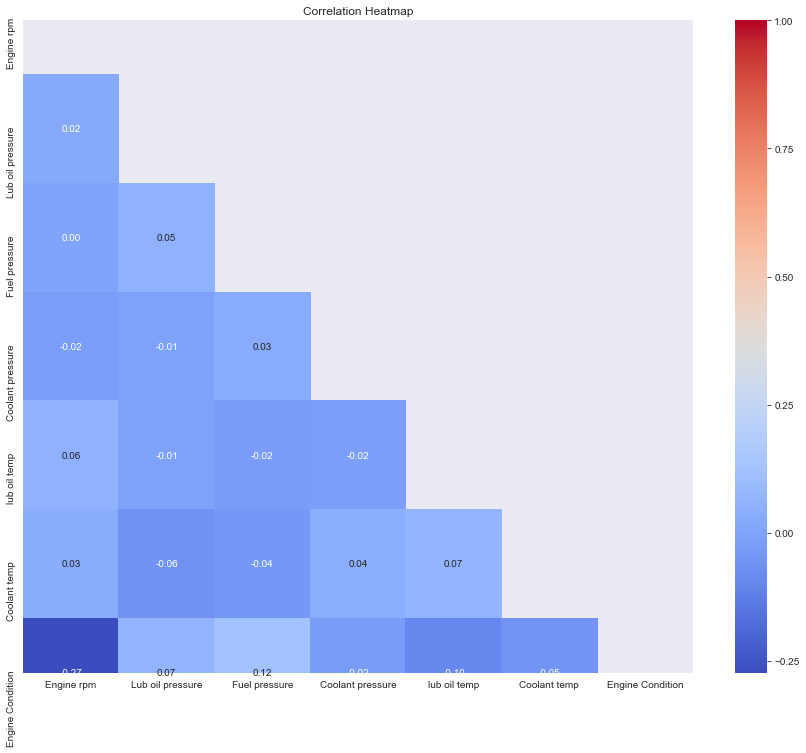

In [20]:
df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))

# Generate the correlation heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)

# Set the plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

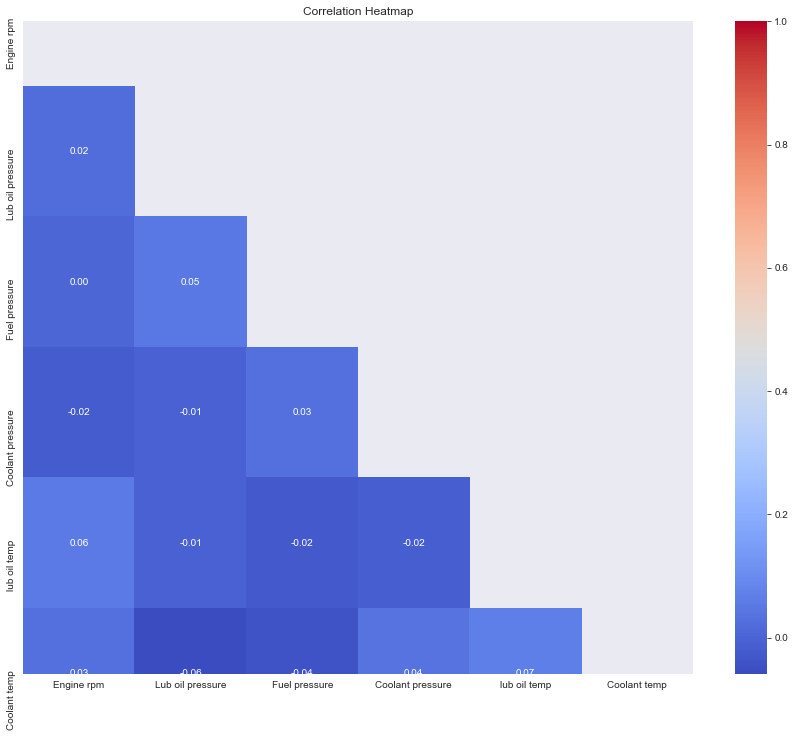

In [21]:
df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))

# Generate the correlation heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)

# Set the plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

Data Split

In [22]:
# # Load your dataset
# df = pd.DataFrame(data, columns=['Engine rpm','Lub oil pressure','Fuel pressure','Coolant pressure','lub oil temp','Coolant temp','Engine Condition'])

# # Split the data into training and testing sets (with 80% of the data for training)
# train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# # Show the number of rows and columns in each set
# print("Training set shape:",train_data.shape)
# print("Testing set shape:",test_data.shape)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

#Show the number of rows and columns in each set
print("Training set shape:",X_train.shape)
print("Testing set shape:",y_test.shape)

Training set shape: (19707, 6)
Testing set shape: (4927,)


MODELLING

Random Forest Classifier


Classification Report :  
               precision    recall  f1-score   support

         0.0       0.74      0.83      0.79      2448
         1.0       0.81      0.72      0.76      2479

    accuracy                           0.77      4927
   macro avg       0.78      0.77      0.77      4927
weighted avg       0.78      0.77      0.77      4927


ACCURACY OF THE MODEL:  0.7745078140856505
[[1778  701]
 [ 410 2038]]


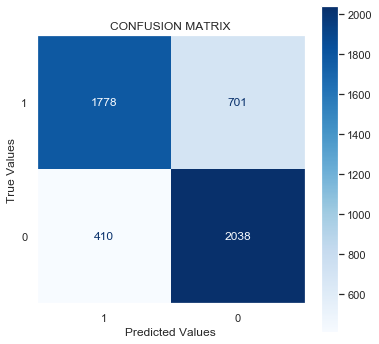

In [24]:
# creating a RF classifier
model = RandomForestClassifier(n_estimators = 100, random_state=42)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train,y_train)

# performing predictions on the test dataset
rfc_pred = model.predict(X_test)
print('\nClassification Report : ','\n',classification_report(y_test, rfc_pred))

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, rfc_pred))

print(confusion_matrix(y_test,rfc_pred,labels=[1,0]))
sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,rfc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 0.878029285870594 



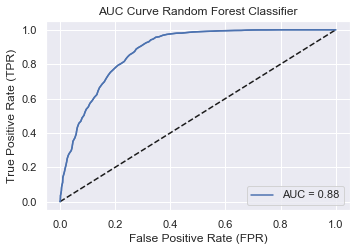

In [25]:
plt.figure(figsize=(25,16))
Y_predict1_proba = model.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)
print('ROC_AUC value :',roc_auc,'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Random Forest Classifier')
plt.grid(True)
plt.show()


Deep Neuron Network

In [26]:
# # Split the data into training and test sets
# train_data, test_data = train_test_split(data, test_size=0.2)

# # Split the training and test sets into features and labels
# X_train = train_data.drop('Engine Condition', axis=1).values
# y_train = train_data['Engine Condition'].values
# X_test = test_data.drop('Engine Condition', axis=1).values
# y_test = test_data['Engine Condition'].values

# # Preprocess the data
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# # Define the model architecture
# model = keras.Sequential([
#     keras.layers.Dense(512, activation='relu', input_shape=(6,)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model on the training data
# model.fit(X_train, y_train, epochs=5)

# # Evaluate the model on test data
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
# print('Test accuracy:', test_acc)


Multi-layer Perceptron Model

Accuracy: 0.6137609092754212
Accuracy score: 0.6137609092754212
Classification report:
               precision    recall  f1-score   support

         0.0       0.57      0.89      0.70      2448
         1.0       0.75      0.34      0.47      2479

    accuracy                           0.61      4927
   macro avg       0.66      0.62      0.58      4927
weighted avg       0.66      0.61      0.58      4927

Accuracy: 0.6137609092754212
AUC Score: 0.6904492837877386
[[ 854 1625]
 [ 278 2170]]


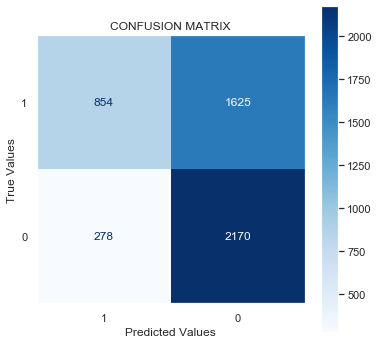

In [27]:
# Define the model and its parameters (in this example, a 3-layer MLP with 100, 50, and 25 neurons in each layer, respectively)
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=1000)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Test the model on the testing data and evaluate the accuracy
accuracy = mlp.score(X_test, y_test)
print("Accuracy:", accuracy)



# Test the model on the testing data and evaluate the accuracy, f1 score, precision, and recall
mlp_pred = mlp.predict(X_test)
# accuracy = mlp.score(X_test, y_test)
# print("Accuracy:", accuracy)

# Evaluate the performance of the model using accuracy score, classification report, and confusion matrix
print("Accuracy score:", accuracy_score(y_test, mlp_pred))
print("Classification report:\n", classification_report(y_test, mlp_pred))



# Test the model on the testing data and evaluate the accuracy and AUC score
y_pred_proba = mlp.predict_proba(X_test)[:,1]
accuracy = mlp.score(X_test, y_test)
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("AUC Score:", auc_score)

print(confusion_matrix(y_test,mlp_pred,labels=[1,0]))
sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,mlp_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()


ROC_AUC value : 0.6904492837877386 



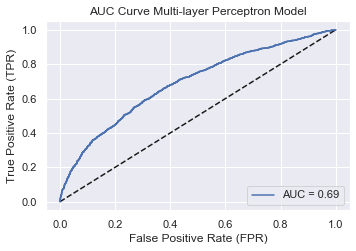

In [28]:
plt.figure(figsize=(25,16))
Y_predict1_proba = mlp.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)
print('ROC_AUC value :',roc_auc,'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Multi-layer Perceptron Model')
plt.grid(True)
plt.show()

Logistic Regression

Accuracy score: 0.6415668763953725
Classification report:
               precision    recall  f1-score   support

         0.0       0.65      0.62      0.63      2448
         1.0       0.64      0.67      0.65      2479

    accuracy                           0.64      4927
   macro avg       0.64      0.64      0.64      4927
weighted avg       0.64      0.64      0.64      4927


ACCURACY OF THE MODEL:  0.6415668763953725
[[1652  827]
 [ 939 1509]]


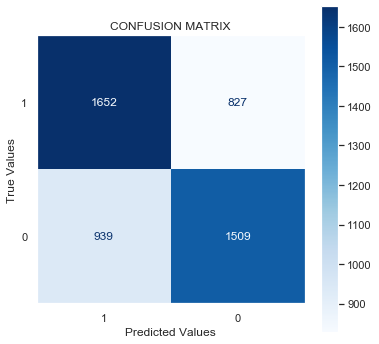

In [29]:
# Initialise Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model for prediction on the testing data
lg_pred = model.predict(X_test)

# Evaluate the performance of the model using accuracy score, classification report, and confusion matrix
print("Accuracy score:", accuracy_score(y_test, lg_pred))
print("Classification report:\n", classification_report(y_test, lg_pred))

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, lg_pred))

print(confusion_matrix(y_test,lg_pred,labels=[1,0]))
sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,lg_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

ROC_AUC value : 0.6862913176565504 



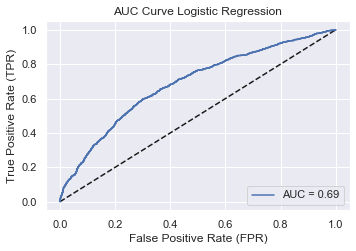

In [30]:
plt.figure(figsize=(25,16))
Y_predict1_proba = model.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)
print('ROC_AUC value :',roc_auc,'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve Logistic Regression')
plt.grid(True)
plt.show()

Gradient Boosting Machine

Classification report:
               precision    recall  f1-score   support

         0.0       0.65      0.72      0.68      2448
         1.0       0.69      0.62      0.65      2479

    accuracy                           0.67      4927
   macro avg       0.67      0.67      0.67      4927
weighted avg       0.67      0.67      0.67      4927

ACCURACY OF THE MODEL:  0.667343210878831
[[1535  944]
 [ 695 1753]]


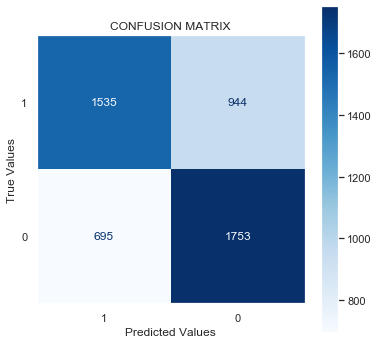

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

gradient_booster.fit(X_train,y_train)

# Predict on test set
gbc_pred = gradient_booster.predict(X_test)
print("Classification report:\n", classification_report(y_test, gbc_pred))

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, gbc_pred))

print(confusion_matrix(y_test,gbc_pred,labels=[1,0]))
sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,gbc_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

Support Vector Machine

Classification report:
               precision    recall  f1-score   support

         0.0       0.63      0.72      0.67      2448
         1.0       0.68      0.59      0.63      2479

    accuracy                           0.65      4927
   macro avg       0.66      0.65      0.65      4927
weighted avg       0.66      0.65      0.65      4927

ACCURACY OF THE MODEL:  0.6537446722143292
[[1462 1017]
 [ 689 1759]]


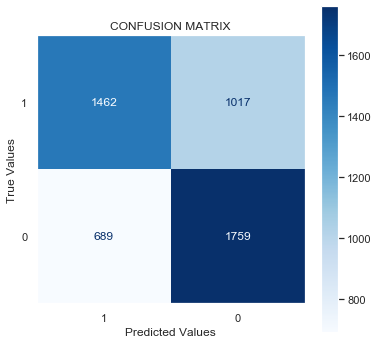

In [32]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, svm_pred))

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, svm_pred))

print(confusion_matrix(y_test,svm_pred,labels=[1,0]))
sns.set(rc = {"figure.figsize":(6,6)})
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,labels=(1,0),normalize=None,cmap='Blues')
disp.ax_.grid(False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX")
plt.show()

In [33]:
plt.figure(figsize=(25,16))
Y_predict1_proba = clf.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
roc_auc = metrics.auc(fpr, tpr)
print('ROC_AUC value :',roc_auc,'\n')

plt.subplot(441)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('AUC Curve SVM')
plt.grid(True)
plt.show()

AttributeError: predict_proba is not available when  probability=False

<Figure size 1800x1152 with 0 Axes>

In [ ]:
## Create a Pickle file using serialization
import pickle 
#pickle_out = open("model.pkl", "wb")
#pickle.dump(model, pickle_out)
#pickle_out.close()

with open('trained_model-1.0.2.pkl', 'wb') as f:
    pickle.dump(model,f)

In [ ]:
model.predict([[1,2,3,4,5,6]])

In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))